In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline

np.random.seed(20171001)
tf.set_random_seed(20171001)
mnist = input_data.read_data_sets("./data/", one_hot=True)

Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz


In [2]:
hidden_size = 1024
with tf.name_scope('X'):
    x = tf.placeholder(tf.float32, [None, 784])
with tf.name_scope('W'):
    w1 = tf.Variable(tf.truncated_normal([784, hidden_size])) #これ重要！
with tf.name_scope('b1'):
    b1 = tf.Variable(tf.zeros([hidden_size]))
with tf.name_scope('Z'):
    z = tf.nn.relu(tf.matmul(x, w1) + b1)

with tf.name_scope('W'):
    w0 = tf.Variable(tf.zeros([hidden_size, 10]))
with tf.name_scope('b0'):
    b0 = tf.Variable(tf.zeros([10]))
with tf.name_scope('P'):
    p = tf.nn.softmax(tf.matmul(z, w0) + b0)

with tf.name_scope('T'):
    t = tf.placeholder(tf.float32, [None, 10])

In [3]:
with tf.name_scope('Loss'):
    loss = -tf.reduce_sum(t * tf.log(p))
with tf.name_scope('Train'):
    train_step = tf.train.AdamOptimizer().minimize(loss)
with tf.name_scope('Acc'):
    correct_prediction =  tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [4]:
sess = tf.InteractiveSession()
with tf.name_scope('summary'):
    tf.summary.scalar('accuracy', accuracy)
    tf.summary.scalar('loss', loss)
    merged = tf.summary.merge_all()
    writer = tf.summary.FileWriter('./logs', sess.graph)

In [6]:
sess.run(tf.global_variables_initializer())
train_p = []
test_p = []
steps = []
i = 0
for _ in range(2000):
    batch_xs, batch_ts = mnist.train.next_batch(100)
    __, summary = sess.run([train_step, merged], feed_dict={x: batch_xs, t: batch_ts})
    
    if i % 100 == 0:
        loss_val, acc_val = sess.run([loss, accuracy], feed_dict = {x: batch_xs, t: batch_ts})
        train_p.append(acc_val)
        test_p.append(sess.run(accuracy, feed_dict={x: mnist.test.images, t: mnist.test.labels}))
        steps.append(i/100)
        test_acc = sess.run(accuracy, feed_dict={x: mnist.test.images, t: mnist.test.labels})
        writer.add_summary(summary, _)
        print("step: %d, loss: %f, acc: %f, test: %f" % (i, loss_val, acc_val, test_acc))
    i += 1

step: 0, loss: 152.791260, acc: 0.510000, test: 0.308400
step: 100, loss: 23.199965, acc: 0.920000, test: 0.898700
step: 200, loss: 16.646893, acc: 0.950000, test: 0.937100
step: 300, loss: 9.637720, acc: 0.970000, test: 0.942000
step: 400, loss: 11.808620, acc: 0.960000, test: 0.946500
step: 500, loss: 7.923934, acc: 0.980000, test: 0.954100
step: 600, loss: 7.571517, acc: 0.980000, test: 0.954600
step: 700, loss: 5.096427, acc: 1.000000, test: 0.958600
step: 800, loss: 5.170148, acc: 0.990000, test: 0.960400
step: 900, loss: 4.521872, acc: 0.990000, test: 0.964400
step: 1000, loss: 8.702643, acc: 0.980000, test: 0.962500
step: 1100, loss: 8.888043, acc: 0.990000, test: 0.964300
step: 1200, loss: 5.311965, acc: 0.970000, test: 0.963000
step: 1300, loss: 2.490308, acc: 0.990000, test: 0.968900
step: 1400, loss: 1.369987, acc: 1.000000, test: 0.965100
step: 1500, loss: 1.640198, acc: 0.990000, test: 0.967400
step: 1600, loss: 7.316021, acc: 0.990000, test: 0.965900
step: 1700, loss: 8.1

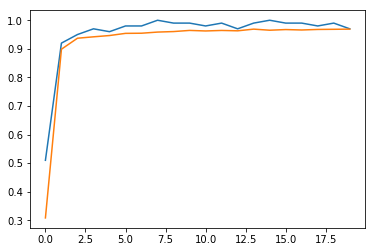

In [7]:
plt.plot(steps, train_p)
plt.plot(steps, test_p)

0.8


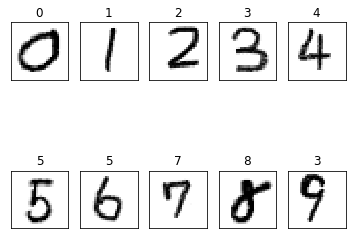

In [9]:
from PIL import Image
import os
filenames = os.listdir('./sample/test_samples')
c = 1
fig = plt.figure(figsize=(6, 5))
labels = []
imgs = []
for name in filenames:
    img = Image.open("./sample/test_samples/" + name).convert('L')
    img.thumbnail((28, 28))
    img = np.array(img, dtype=np.float32)
    img = 1-np.array(img / 255)
    img = img.reshape(1, 784)
    imgs.append(img)
    label = np.array([0,0,0,0,0,0,0,0,0,0])
    label[c-1] = 1
    labels.append(label)
    test_p = sess.run(p, feed_dict={x: img})
    subplot = fig.add_subplot(2, 5, c)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % (np.argmax(test_p)))
    subplot.imshow(img.reshape((28, 28)), vmin=0, vmax = 1, cmap=plt.cm.gray_r, interpolation="nearest")
    c += 1
print(sess.run(accuracy, feed_dict={x: np.array(imgs).reshape((10, 784)), t: labels}))

In [14]:
sess.run(accuracy, feed_dict={x: mnist.test.images, t: mnist.images.labels})

AttributeError: 'Datasets' object has no attribute 'images'

In [13]:
mnist.test.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

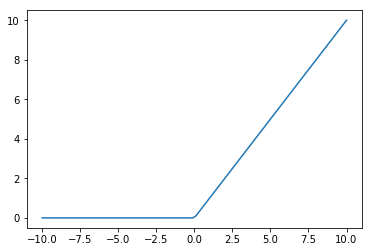

In [28]:
x = np.linspace(-10,10,100)
y = np.maximum(0, x)
plt.plot(x, y)